In [2]:
!pip install -q pandas seaborn matplotlib networkx scipy scikit-learn

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
from matplotlib import pyplot, colors, rc
import matplotlib.gridspec as gridspec
import matplotlib.cm as cm
import numpy as np
import yaml
import itertools

In [20]:
col_names = ["dataset", "family", "num_seq", "num_ref_seq", "avg_len", "avg_ref_len", "sim", "SP", 
 "modeler", "TC", "column", "s", "h:m:s", "max_rss", "max_vms", "max_uss", 
"max_pss", "io_in", "io_out", "mean_load", "cpu_time"]

In [22]:
with open("lm_experiments/config.yml", "r") as stream:
    try:
        config = yaml.safe_load(stream)
    except yaml.YAMLError as exc:
        print(exc)
config

{'language_models': ['esm2', 'protT5', 'proteinBERT'],
 'dimensions': [16, 32, 64, 128],
 'activation': ['sigmoid'],
 'num_components': [0, 1, 10, 100],
 'frozen_insertions': [False],
 'use_l2': [True],
 'L2_match': [0.0],
 'L2_insert': [1000.0],
 'temperature_mode': ['trainable']}

In [52]:
dfs = []
for lm, dim, act, num_comp, frz_ins, use_l2, L2_match, L2_insert, temp_mode in itertools.product(*config.values()):
    experiment_name = f"{lm}_{dim}_{act}_{num_comp}_{frz_ins}_{use_l2}_{L2_match}_{L2_insert}_{temp_mode}"
    df = pd.read_csv("lm_experiments/results/learnMSA_language_"+experiment_name+".out", 
                        index_col=False, sep=' ', names=col_names)
    df["experiment"] = experiment_name
    df["lm"] = lm
    df["dim"] = dim
    df["act"] = act
    df["num_comp"] = num_comp
    df["frz_ins"] = frz_ins
    df["use_l2"] = use_l2
    df["L2_match"] = L2_match
    df["L2_insert"] = L2_insert
    df["temp_mode"] = temp_mode
    dfs.append(df)

# Concatenate all dataframes into a single dataframe
merged_df = pd.concat(dfs, ignore_index=True)

In [53]:
merged_df

,dataset,family,num_seq,num_ref_seq,avg_len,avg_ref_len,sim,SP,modeler,TC,...,experiment,lm,dim,act,num_comp,frz_ins,use_l2,L2_match,L2_insert,temp_mode
0,homfam,ricin,747,7,198.7080,281,37.5,91.2,91.7,75.8,...,esm2_16_sigmoid_0_False_True_0.0_1000.0_trainable,esm2,16,sigmoid,0,False,True,0.0,1000.0,trainable
1,homfam,ghf10,1502,5,220.3400,364,43.3,93.0,93.2,80.2,...,esm2_16_sigmoid_0_False_True_0.0_1000.0_trainable,esm2,16,sigmoid,0,False,True,0.0,1000.0,trainable
2,homfam,seatoxin,93,5,43.6344,54,42.6,62.7,82.1,14.3,...,esm2_16_sigmoid_0_False_True_0.0_1000.0_trainable,esm2,16,sigmoid,0,False,True,0.0,1000.0,trainable
3,homfam,mofe,2567,6,353.0740,609,30.0,85.3,86.2,66.2,...,esm2_16_sigmoid_0_False_True_0.0_1000.0_trainable,esm2,16,sigmoid,0,False,True,0.0,1000.0,trainable
4,homfam,cyt3,385,6,92.3065,130,40.3,77.7,79.3,55.1,...,esm2_16_sigmoid_0_False_True_0.0_1000.0_trainable,esm2,16,sigmoid,0,False,True,0.0,1000.0,trainable
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4507,homfam,trfl,837,7,242.3150,702,61.9,93.5,94.1,85.9,...,proteinBERT_128_sigmoid_100_False_True_0.0_100...,proteinBERT,128,sigmoid,100,False,True,0.0,1000.0,trainable
4508,homfam,TNF,556,5,119.9030,176,32.0,85.0,84.1,68.2,...,proteinBERT_128_sigmoid_100_False_True_0.0_100...,proteinBERT,128,sigmoid,100,False,True,0.0,1000.0,trainable
4509,homfam,scorptoxin,363,8,53.2562,74,46.3,90.4,89.5,74.0,...,proteinBERT_128_sigmoid_100_False_True_0.0_100...,proteinBERT,128,sigmoid,100,False,True,0.0,1000.0,trainable
4510,homfam,aldosered,13277,7,268.5470,386,41.6,86.8,89.4,68.3,...,proteinBERT_128_sigmoid_100_False_True_0.0_100...,proteinBERT,128,sigmoid,100,False,True,0.0,1000.0,trainable


In [57]:
means = merged_df.groupby(["dataset", "experiment"])[["TC", "SP", "s"]].mean().reset_index()
pd.set_option('display.max_colwidth', None)
means.sort_values("SP", ascending=False)

,dataset,experiment,TC,SP,s
28,homfam,protT5_64_sigmoid_0_False_True_0.0_1000.0_trainable,66.305319,87.244681,2189.477200
9,homfam,esm2_32_sigmoid_100_False_True_0.0_1000.0_trainable,66.251064,87.091489,2190.771861
5,homfam,esm2_16_sigmoid_100_False_True_0.0_1000.0_trainable,65.648936,87.061702,2103.660577
31,homfam,protT5_64_sigmoid_1_False_True_0.0_1000.0_trainable,66.379787,87.003191,2116.968777
20,homfam,protT5_16_sigmoid_0_False_True_0.0_1000.0_trainable,65.868085,86.895745,2106.458034
19,homfam,protT5_128_sigmoid_1_False_True_0.0_1000.0_trainable,65.563830,86.764894,2332.018026
24,homfam,protT5_32_sigmoid_0_False_True_0.0_1000.0_trainable,65.639362,86.723404,2103.528743
8,homfam,esm2_32_sigmoid_0_False_True_0.0_1000.0_trainable,65.548936,86.645745,2216.149290
46,homfam,proteinBERT_64_sigmoid_10_False_True_0.0_1000.0_trainable,65.131915,86.613830,2136.628715
40,homfam,proteinBERT_32_sigmoid_0_False_True_0.0_1000.0_trainable,65.090426,86.554255,1984.851915


## Evaluate the WIP experiments 

These experiments were used to figure out potential sets of hyperparameters as a starting point for a more extensive search.

In [4]:
# Define the list of file names
suffixes = ["A", "B", "C", "D", "E", "F", "G", "H", "I", 
            "J", "K", "L", "M", "N", "O", "P", "Q", "R",
            "S", "T", "U", "V", "W"]
tools = ["wip/learnMSA_language_"+s for s in suffixes]+["learnMSA_language"]#["learnMSA_paper", "learnMSA", "learnMSA_language", "wip/learnMSA_langauge" "famsa", "t_coffee", "clustalo", "magus", "muscle", "mafft"]
num_tools = len(tools)

# Create an empty list to store the dataframes
dfs = []

# Read each file and append its contents to the list
for tool in tools:
    df = pd.read_csv(tool+".tbl", index_col=False, sep=' ', names=["dataset", "family", "num_seq", "num_ref_seq", 
                                                                "avg_len", "avg_ref_len", "sim", "SP", 
                                                                "modeler", "TC", "column", "s", 
                                                                "h:m:s", "max_rss", "max_vms", "max_uss", 
                                                                "max_pss", "io_in", "io_out", "mean_load", 
                                                                "cpu_time"])
    df["tool"] = tool
    df["overlength"] = df.avg_ref_len / df.avg_len
    df = df.set_index(df.dataset + "_" + df.family)
    dfs.append(df)

# Concatenate all dataframes into a single dataframe
merged_df = pd.concat(dfs, ignore_index=True)

In [5]:
(dfs[0].SP - dfs[1].SP).sort_values()

homfam_OTCace          -77.8
homfam_peroxidase      -47.7
homfam_blmb            -35.1
homfam_Rhodanese       -31.7
homfam_ghf13           -28.8
                        ... 
homfam_aldosered         3.8
homfam_Sulfotransfer     4.7
homfam_rvp               6.9
homfam_gluts             7.2
homfam_mofe             27.7
Name: SP, Length: 94, dtype: float64

In [6]:
merged_df.head()

,dataset,family,num_seq,num_ref_seq,avg_len,avg_ref_len,sim,SP,modeler,TC,...,max_rss,max_vms,max_uss,max_pss,io_in,io_out,mean_load,cpu_time,tool,overlength
0,homfam,ricin,747,7,198.7080,281,37.5,93.3,92.8,80.2,...,12963.51,127363.74,12474.54,12588.40,1.99,3.60,180.30,1013.31,wip/learnMSA_language_A,1.414135
1,homfam,ghf10,1502,5,220.3400,364,43.3,90.5,90.6,77.1,...,13807.01,114181.82,13298.39,13410.62,1.95,7.39,216.02,2961.67,wip/learnMSA_language_A,1.651992
2,homfam,seatoxin,93,5,43.6344,54,42.6,66.9,64.8,12.2,...,15150.92,127363.57,14736.74,14848.89,1.99,1.15,137.51,383.06,wip/learnMSA_language_A,1.237556
3,homfam,mofe,2567,6,353.0740,609,30.0,82.4,86.8,61.1,...,15163.08,113453.95,14639.73,14751.84,1.94,11.52,205.17,4323.23,wip/learnMSA_language_A,1.724851
4,homfam,cyt3,385,6,92.3065,130,40.3,80.8,80.0,58.5,...,15075.40,112888.28,14700.88,14813.03,1.98,1.55,119.60,314.49,wip/learnMSA_language_A,1.408352


In [7]:
merged_df[merged_df.family == "peroxidase"]

,dataset,family,num_seq,num_ref_seq,avg_len,avg_ref_len,sim,SP,modeler,TC,...,max_rss,max_vms,max_uss,max_pss,io_in,io_out,mean_load,cpu_time,tool,overlength
35,homfam,peroxidase,4514,5,256.626,383,37.3,27.1,49.6,0.3,...,13815.62,127371.04,13309.51,13421.67,1.90,14.00,226.65,4316.24,wip/learnMSA_language_A,1.492444
129,homfam,peroxidase,4514,5,256.626,383,37.3,74.8,77.2,45.8,...,15154.55,120411.34,14637.67,14786.69,1.98,11.13,292.76,6073.79,wip/learnMSA_language_B,1.492444
223,homfam,peroxidase,4514,5,256.626,383,37.3,50.4,68.7,2.0,...,14009.34,112151.02,13973.02,13988.71,4.00,0.67,203.60,3623.93,wip/learnMSA_language_C,1.492444
317,homfam,peroxidase,4514,5,256.626,383,37.3,75.4,84.3,47.0,...,13260.66,120314.13,12753.41,12902.43,1.98,10.74,258.37,4569.71,wip/learnMSA_language_D,1.492444
411,homfam,peroxidase,4514,5,256.626,383,37.3,74.2,77.0,47.3,...,12442.14,127371.39,11953.16,12102.18,1.98,11.08,329.78,5577.38,wip/learnMSA_language_E,1.492444
505,homfam,peroxidase,4514,5,256.626,383,37.3,69.2,83.4,51.0,...,12480.52,121188.49,12006.28,12158.45,1.98,10.96,274.61,4511.07,wip/learnMSA_language_F,1.492444
599,homfam,peroxidase,4514,5,256.626,383,37.3,80.1,82.5,50.1,...,13220.02,122253.32,12745.53,12897.57,1.98,11.05,288.13,4717.87,wip/learnMSA_language_G,1.492444
693,homfam,peroxidase,4514,5,256.626,383,37.3,82.4,84.0,56.4,...,12939.52,127371.15,12409.21,12554.82,1.98,11.15,292.79,6441.00,wip/learnMSA_language_H,1.492444
787,homfam,peroxidase,4514,5,256.626,383,37.3,81.9,83.5,51.3,...,12483.24,127369.96,11928.71,12074.78,1.98,11.27,300.73,5172.53,wip/learnMSA_language_I,1.492444
881,homfam,peroxidase,4514,5,256.626,383,37.3,75.4,76.1,47.6,...,13842.93,121306.95,13354.07,13477.56,1.98,10.66,259.23,5275.86,wip/learnMSA_language_J,1.492444


In [8]:
means = merged_df.groupby(["dataset", "tool"])[["TC", "SP", "s"]].mean().reset_index()
# pull some metadata about the run for a good comparison
config_items = ["use_l2", "L2_match", "L2_insert", "use_temperature", "use_fixed_temperatur", "mvn_prior_components", "scoring_model_config", "frozen_insertions"]
for i,tool in means[["tool"]].itertuples():
    if tool == "learnMSA_language":
        continue
    for item in config_items:
        with open(f"{tool}/logs/homfam/aadh.log") as file:
            for line in file:
                if line.startswith(item):
                    v = line[len(item)+3:]
                    if item == "scoring_model_config":
                        v = v[19:-1].split(",")
                        for j,x in enumerate(["lm_name", "dim", "activation", "_suffix"]):
                            means.at[i, x] = v[j].strip()[len(x)+1:]
                    else:
                        means.at[i, item] = v.strip()
    
means

,dataset,tool,TC,SP,s,frozen_insertions,use_l2,mvn_prior_components,lm_name,dim,activation,_suffix,L2_match,L2_insert,use_temperature,use_fixed_temperatur
0,homfam,learnMSA_language,65.477660,86.954255,1361.749285,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,homfam,wip/learnMSA_language_A,60.077660,82.777660,1375.901793,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,homfam,wip/learnMSA_language_B,64.387234,86.058511,1393.615394,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,homfam,wip/learnMSA_language_C,58.702128,80.947872,1357.241653,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,homfam,wip/learnMSA_language_D,64.817021,85.745745,1376.636111,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,homfam,wip/learnMSA_language_E,64.340426,85.330851,1409.950552,True,False,100,esm2,64,softmax,,NaN,NaN,NaN,NaN
6,homfam,wip/learnMSA_language_F,65.405319,86.177660,1419.314865,True,False,100,esm2,32,softmax,,NaN,NaN,NaN,NaN
7,homfam,wip/learnMSA_language_G,64.048936,85.974468,1397.941944,True,False,100,esm2,32,sigmoid,,10.0,0.0,NaN,NaN
8,homfam,wip/learnMSA_language_H,65.459574,86.786170,1349.240970,True,False,100,esm2,32,sigmoid,100),10.0,0.0,NaN,NaN
9,homfam,wip/learnMSA_language_I,65.472340,87.351064,1463.585204,False,True,100,esm2,32,sigmoid,,0.0,1000.0,NaN,NaN


In [9]:
means.sort_values("SP", ascending=False)

,dataset,tool,TC,SP,s,frozen_insertions,use_l2,mvn_prior_components,lm_name,dim,activation,_suffix,L2_match,L2_insert,use_temperature,use_fixed_temperatur
9,homfam,wip/learnMSA_language_I,65.472340,87.351064,1463.585204,False,True,100,esm2,32,sigmoid,,0.0,1000.0,NaN,NaN
12,homfam,wip/learnMSA_language_L,66.127660,87.091489,1453.550594,False,True,100,esm2,32,sigmoid,,0.0,1000.0,True,True
0,homfam,learnMSA_language,65.477660,86.954255,1361.749285,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,homfam,wip/learnMSA_language_H,65.459574,86.786170,1349.240970,True,False,100,esm2,32,sigmoid,100),10.0,0.0,NaN,NaN
22,homfam,wip/learnMSA_language_W,65.344681,86.604255,2149.202913,False,True,100,esm2,32,sigmoid,,0.0,1000.0,NaN,NaN
21,homfam,wip/learnMSA_language_V,65.211702,86.556383,2139.100959,False,True,100,esm2,32,sigmoid,,0.0,1000.0,NaN,NaN
13,homfam,wip/learnMSA_language_M,65.388298,86.481915,1258.878466,False,True,100,esm2,32,sigmoid,,0.0,1000.0,False,False
6,homfam,wip/learnMSA_language_F,65.405319,86.177660,1419.314865,True,False,100,esm2,32,softmax,,NaN,NaN,NaN,NaN
2,homfam,wip/learnMSA_language_B,64.387234,86.058511,1393.615394,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17,homfam,wip/learnMSA_language_R,64.163830,86.036170,1445.108031,True,True,100,esm2,32,softmax,,16.0,0.0,True,False


In [6]:
A = pd.read_csv("wip/learnMSA_language.tbl", index_col=False, sep=' ', names=["dataset", "family", "num_seq", "num_ref_seq", 
                                                                "avg_len", "avg_ref_len", "sim", "SP", 
                                                                "modeler", "TC", "column", "s", 
                                                                "h:m:s", "max_rss", "max_vms", "max_uss", 
                                                                "max_pss", "io_in", "io_out", "mean_load", 
                                                                "cpu_time"])
B = pd.read_csv("learnMSA_language.tbl", index_col=False, sep=' ', names=["dataset", "family", "num_seq", "num_ref_seq", 
                                                                "avg_len", "avg_ref_len", "sim", "SP", 
                                                                "modeler", "TC", "column", "s", 
                                                                "h:m:s", "max_rss", "max_vms", "max_uss", 
                                                                "max_pss", "io_in", "io_out", "mean_load", 
                                                                "cpu_time"])

In [9]:
A.groupby(["dataset"])[["TC", "SP", "s"]].mean().reset_index(), B.groupby(["dataset"])[["TC", "SP", "s"]].mean().reset_index()

(  dataset        TC         SP            s
 0  homfam  45.07234  71.629787  2673.607732,
   dataset        TC         SP            s
 0  homfam  65.47766  86.954255  1361.749285)

In [17]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print((A.set_index("family")[["TC", "SP"]] - B.set_index("family")[["TC", "SP"]]).sort_values("SP"))

                   TC    SP
family                     
Ald_Xan_dh_2    -63.0 -67.5
LIM             -89.0 -60.0
aadh            -59.6 -59.4
ghf11           -77.6 -55.9
ricin           -72.5 -53.5
Stap_Strp_toxin -49.4 -52.2
serpin          -81.7 -51.1
PDZ             -64.7 -51.0
lyase_1         -53.9 -49.3
DEATH           -50.0 -49.0
tgfb            -40.1 -48.2
hip             -58.3 -47.8
mofe            -62.3 -45.7
rhv             -34.4 -45.1
glob            -52.9 -44.5
sodfe           -42.1 -42.1
adh             -56.0 -38.5
proteasome      -31.7 -38.2
Acetyltransf    -34.9 -35.1
DMRL_synthase   -62.7 -32.1
tRNA-synt_2b    -22.7 -31.8
ghf13           -28.5 -31.2
rrm             -18.0 -29.6
Rhodanese       -26.5 -28.1
hormone_rec     -52.3 -26.9
Sulfotransfer   -44.9 -25.6
az              -32.6 -25.2
sodcu           -39.1 -24.6
peroxidase      -41.3 -22.4
cytb            -55.4 -22.2
p450            -34.9 -20.4
aldosered       -61.6 -18.2
cys             -30.6 -18.0
ghf5            -34.

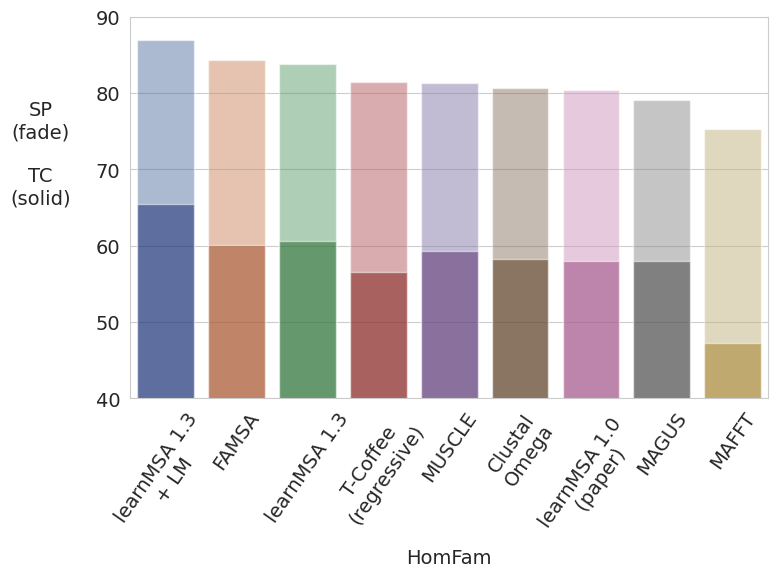

In [6]:
# make a stacked bar plot that compares SP and TC scores for all tools 
# for each dataset
datasets = means.dataset.unique()
sns.set_style("whitegrid")
font = {"size"   : 14}
rc('font', **font)
fig = plt.figure(figsize=(8,6))
#get the permutation that sorts the tools by their mean SP score
sorted_ds_tools = means.groupby(["dataset", "tool"])["SP"].mean().sort_values(ascending=False).index
means_sorted = means.set_index(["dataset", "tool"]).loc[sorted_ds_tools].reset_index()
for i,d in enumerate(datasets):
    data = means_sorted[means_sorted.dataset == d]
    data.tool = data.tool.astype('category')
    data.tool = data.tool.cat.rename_categories({"learnMSA_language" : "learnMSA 1.3\n+ LM", 
                                                 "learnMSA_paper" : "learnMSA 1.0 \n (paper)", 
                                                 "learnMSA" : "learnMSA 1.3", 
                                                 "famsa" : "FAMSA",
                                                 "muscle" : "MUSCLE",
                                                 "clustalo" : "Clustal\nOmega",
                                                 "magus" : "MAGUS",
                                                 "mafft" : "MAFFT",
                                                 "t_coffee" : "T-Coffee\n(regressive)"})
    data.tool = data.tool.astype('object')
    ax = fig.add_subplot(datasets.size, 1, i+1)
    #render sp scores 
    sp = sns.barplot(
        data=data, x="tool", y="SP",
        palette="deep", alpha=.5, ax=ax)
    #render tc scores as stacked bars on top
    tc = sns.barplot(data=data, x="tool", y="TC",
        palette="dark", alpha=.5, ax=ax)
    ax.set_ylim(40, 90)
    ax.set_xlabel({"homfam" : "HomFam"}[d])
    for item in ax.get_xticklabels():
        item.set_rotation(55)
    ax.set_ylabel("SP\n(fade)\n\nTC\n(solid)", rotation=0, labelpad=40)
#save as pdf
plt.tight_layout()
plt.savefig("plots/SP_TC.pdf")
plt.savefig("plots/SP_TC.png")

In [8]:
import sys
sys.path.append('../learnMSA')

In [9]:
from learnMSA.msa_hmm.Training import EmbeddingBatchGenerator
from learnMSA.msa_hmm.Configuration import make_default
from learnMSA.msa_hmm.SequenceDataset import AlignedDataset

2023-08-25 12:57:25.587845: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI AVX512_BF16 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-25 12:57:25.664972: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-08-25 12:57:25.679715: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-08-25 12:57:25.935608: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvi

In [52]:
def heatmap_probs(filename, i, j, ax, file_fmt="fasta",
                    lm_name="esm2", dim=32, use_finetuned_lm=False,
                    start1=0, start2=0, len1=50, len2=50, 
                    custom_title=None,
                    path_alignments=[], path_colors=[], path_labels=[], label_settings=[{}]):
    ''' Plots the heatmap of the emission probabilities of the language model for the i-th and j-th sequence in the file.
        filename: path to the file containing the sequences to embed
        i: index of the first sequence
        j: index of the second sequence
        lm_name: name of the language model to use
        dim: reduced dimension of the scoring model
        use_finetuned_lm: whether to use the finetuned version of the language model
        start1: start position of the first sequence
        start2: start position of the second sequence
        len1: length of the first sequence
        len2: length of the second sequence
        custom_title: a string used as title
    '''
    emb_gen = EmbeddingBatchGenerator(lm_name, reduced_embedding_dim=dim, use_finetuned_lm=use_finetuned_lm, shuffle=False)
    config = make_default(1)
    data = AlignedDataset(filename, file_fmt)
    emb_gen.configure(data, config)
    emb = emb_gen(np.array([i,j]))[-1]
    attention_map = emb_gen.scoring_model.layers[-1](emb[0], emb[1], a_is_reduced=True, b_is_reduced=True, training=False)[0]

    def compute_path(col1, col2):
        M = np.array([[col1[u] == col2[v] for u in range(min(len(seq1), len1))] for v in range(min(len(seq2), len2))])
        return np.argwhere(M)

    seq1 = str(data.get_record(i).seq).upper().replace('-', '').replace('.', '')
    seq2 = str(data.get_record(j).seq).upper().replace('-', '').replace('.', '')
    col1 = data.get_column_map(i)
    col2 = data.get_column_map(j)
    annot = [["x" if col1[u] == col2[v] else "" for v in range(start2, min(len(seq2), start2+len2))] for u in range(start1, min(len(seq1), start1+len1))] 
    if custom_title is None: 
        sub_title = lm_name + " dim=" + str(dim)
    else:
        sub_title = custom_title
    sns.heatmap(attention_map[start1:min(len(seq1), start1+len1), start2:min(len(seq2), start2+len2)], 
                cmap="OrRd",
                annot=annot, 
                fmt="",
                xticklabels=seq2[start2:start2+len2], 
                yticklabels=seq1[start1:start1+len1],
                ax = ax, 
                annot_kws={"fontsize" : max(4, 500 / max(len1, len2)), "alpha": 0.9},
                cbar_kws = {"label": "probability", "pad": -0.1, "shrink": 0.3, "location": "bottom", "anchor" : (0.1, 1.0)},
                ).set_title(sub_title, {"fontsize": 16})
    #set x label
    ax.set_xlabel(f"{data.seq_ids[j]}/{start2}-{start2+len2} (target)", {"fontsize": 14})
    ax.set_ylabel(f"{data.seq_ids[i]}/{start1}-{start1+len1} (query)", {"fontsize": 14})
    #rotate x and y tick labels
    ax.set_xticklabels(ax.get_xticklabels(), rotation=0, fontsize=10)
    ax.set_yticklabels(ax.get_yticklabels(), rotation=0, fontsize=8)
    for file, color, label, settings in zip(path_alignments, path_colors, path_labels, label_settings):
        path_data = AlignedDataset(file, fmt="fasta")
        c1 = path_data.get_column_map(i)[start1:min(len(seq1), start1+len1)]
        c2 = path_data.get_column_map(j)[start2:min(len(seq2), start2+len2)]
        path = compute_path(c1, c2)
        plt.plot(path[:,0], path[:,1], color=color, lw=1, alpha=0.35)
        text_offset = settings["offset"] if "offset" in settings else 0
        pos = settings["pos"] if "pos" in settings else 0.5
        n = int(path.shape[0]*pos)
        plt.text(path[n,0]+text_offset, path[n,1], label, color=color, fontsize=12, ha="center", va="center")
    

Computing all embeddings (this may take a while).


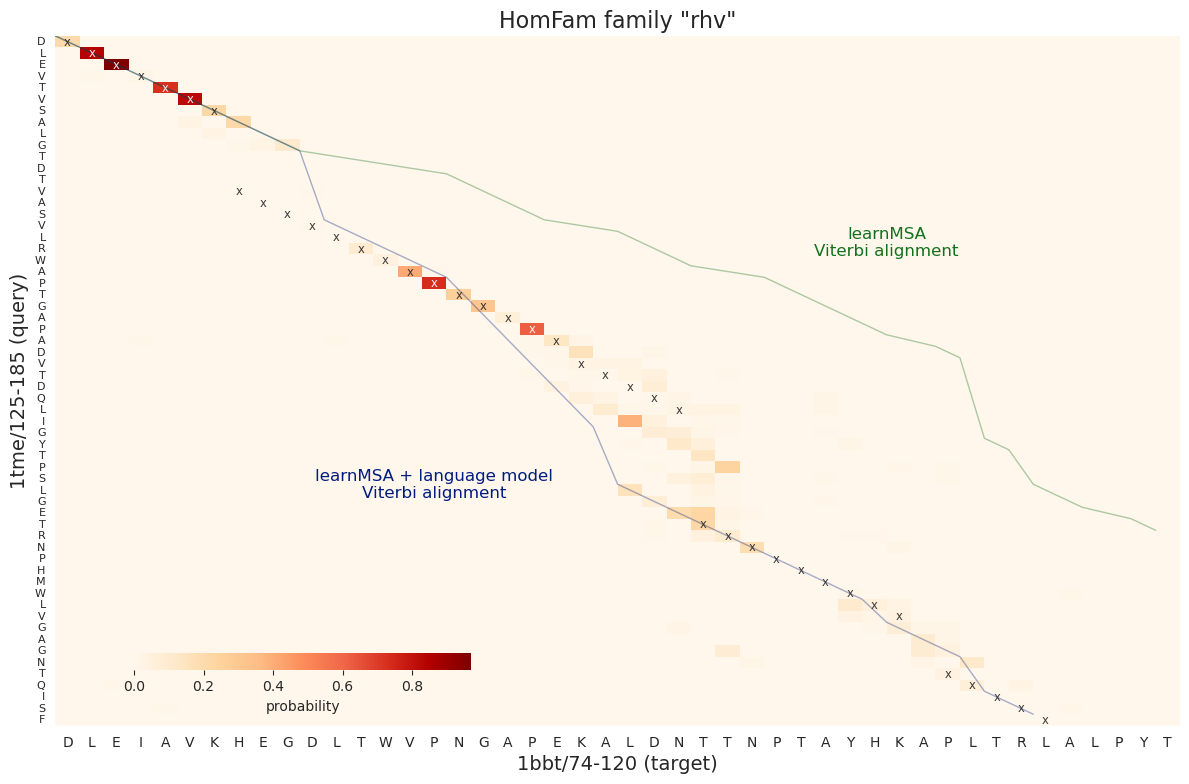

In [57]:
fig, ax = plt.subplots(1,1, figsize=(12, 8))
heatmap_probs("data/homfam/refs/rhv", 0, 2, ax, start1=125, start2=74, len1=60, len2=46, 
                path_alignments=["learnMSA/projections/homfam/rhv", "learnMSA_language/projections/homfam/rhv"], 
                path_colors=[sns.color_palette("dark")[2], sns.color_palette("dark")[0]], 
                path_labels=["learnMSA\nViterbi alignment", "learnMSA + language model\nViterbi alignment"],
                label_settings=[{"offset" : 10, "pos" : 0.5}, {"offset" : -7.5, "pos" : 0.5}],
                custom_title="HomFam family \"rhv\"")
fig.tight_layout()
fig.savefig("plots/probs_and_paths_rhv.pdf")
fig.savefig("plots/probs_and_paths_rhv.png") 

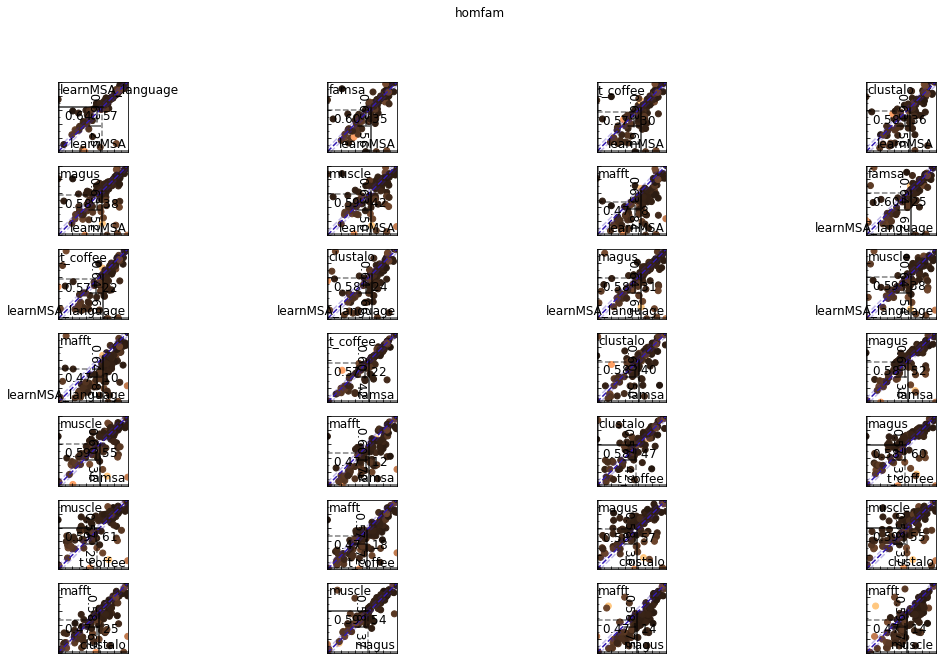

In [ ]:
# experimental
for d in datasets:
    cmap = cm.get_cmap(name="copper")
    data = pd.concat([dfs[i].loc[dfs[i].dataset == dataset].TC for i in range(len(tools))] + [dfs[0].loc[dfs[0].dataset == dataset].overlength], axis=1)
    numpy_data = data.iloc[:,:-1].to_numpy().transpose() / 100.
    max_val = np.amax(data.iloc[:,-1])
    colors = [cmap(x / max_val)[:-1] for x in data.iloc[:,-1]]

    fig, ax = scatter_comparison(numpy_data, labels=tools, color=colors)
    fig.set_size_inches(18.5, 10.5)
    fig.suptitle(dataset)